<a href="https://www.kaggle.com/code/subhajeetdas/netflix-stock-price-prediction?scriptVersionId=125293017" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/netflix-stock-price-prediction/NFLX.csv


# Data Loading

In [2]:
df = pd.read_csv("/kaggle/input/netflix-stock-price-prediction/NFLX.csv")

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


# Data Preparation

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.shape

(1009, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [8]:
train, test = train_test_split(df, test_size = 0.2)

In [9]:
test_pred = test.copy()

In [10]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
254,2019-02-08,338.000000,348.000000,338.000000,347.570007,347.570007,7561400
687,2020-10-27,490.010010,490.489990,482.929993,488.929993,488.929993,3627200
394,2019-08-29,295.000000,299.929993,294.989990,296.779999,296.779999,4388500
815,2021-05-03,512.650024,518.950012,505.200012,509.109985,509.109985,4091900
764,2021-02-18,549.000000,550.000000,538.229980,548.219971,548.219971,2456200
389,2019-08-22,298.649994,300.329987,293.149994,296.929993,296.929993,4974200
253,2019-02-07,347.899994,348.750000,339.019989,344.709991,344.709991,7864500
777,2021-03-09,507.309998,513.109985,503.820007,506.440002,506.440002,3470000
983,2021-12-30,612.989990,620.609985,611.239990,612.090027,612.090027,1625100
41,2018-04-05,293.149994,299.160004,289.109985,293.970001,293.970001,10655200


In [11]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
473,2019-12-20,335.000000,338.000000,330.600006,336.899994,336.899994,9914900
889,2021-08-17,515.469971,520.789978,514.200012,518.909973,518.909973,2309800
334,2019-06-05,354.380005,357.880005,348.709991,355.730011,355.730011,5020100
124,2018-08-02,337.230011,345.000000,334.709991,344.500000,344.500000,7131300
221,2018-12-20,264.640015,269.899994,251.880005,260.579987,260.579987,16792900
828,2021-05-20,489.549988,502.700012,488.980011,501.670013,501.670013,3721200
263,2019-02-22,360.339996,366.130005,360.049988,363.019989,363.019989,7088200
719,2020-12-11,495.000000,503.339996,494.850006,503.220001,503.220001,3210900
407,2019-09-18,294.989990,296.049988,287.450012,291.559998,291.559998,7811100
278,2019-03-15,361.019989,364.000000,358.890015,361.459991,361.459991,8444500


In [12]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [13]:
y_train = train['Close'].values
y_test = test['Close'].values

# Linear Regression

In [14]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model_lnr.predict(x_test)

In [16]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[258.18515112]


# Model Evaluation

In [17]:
print("MSE",round(mean_squared_error(y_test,y_pred), 4))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 4))
print("R2 Score : ", round(r2_score(y_test,y_pred), 4))

MSE 21.5179
RMSE 4.6387
R2 Score :  0.9982


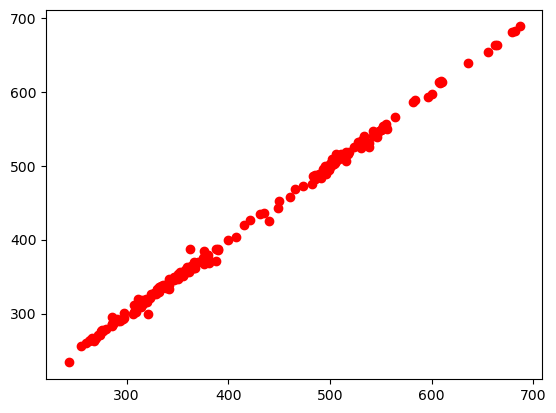

In [18]:
plt.scatter(y_pred, y_test, color='red', marker='o')

In [19]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
473,2019-12-20,335.000000,338.000000,330.600006,336.899994,336.899994,9914900,334.254265
889,2021-08-17,515.469971,520.789978,514.200012,518.909973,518.909973,2309800,518.457026
334,2019-06-05,354.380005,357.880005,348.709991,355.730011,355.730011,5020100,352.889218
124,2018-08-02,337.230011,345.000000,334.709991,344.500000,344.500000,7131300,341.873793
221,2018-12-20,264.640015,269.899994,251.880005,260.579987,260.579987,16792900,259.841952
...,...,...,...,...,...,...,...,...
905,2021-09-09,606.469971,609.440002,596.549988,597.539978,597.539978,2954200,600.724675
412,2019-09-25,255.710007,266.600006,253.699997,264.750000,264.750000,11643800,263.714257
37,2018-03-29,287.000000,295.350006,275.899994,295.350006,295.350006,19145500,286.129244
817,2021-05-05,504.989990,507.779999,494.630005,496.079987,496.079987,3129400,498.965972


In [20]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,415.610146,109.323835,233.880005,332.040008,372.919998,510.290001,688.289978
Close_Prediction,202.0,416.133271,108.860289,243.259144,331.690966,375.818371,508.784060,686.688142


<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you! For viewing this Notebook, do upvote if you like it and please feel free to provide feedback.</em><br>
<br>    
<p style="text-align:center"><img src="https://allfreethankyounotes.com/wp-content/uploads/2021/01/all-free-thank-you-gif-3.gif" width="480" height="373"></p>